# Hierarchical Clustering

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch



## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

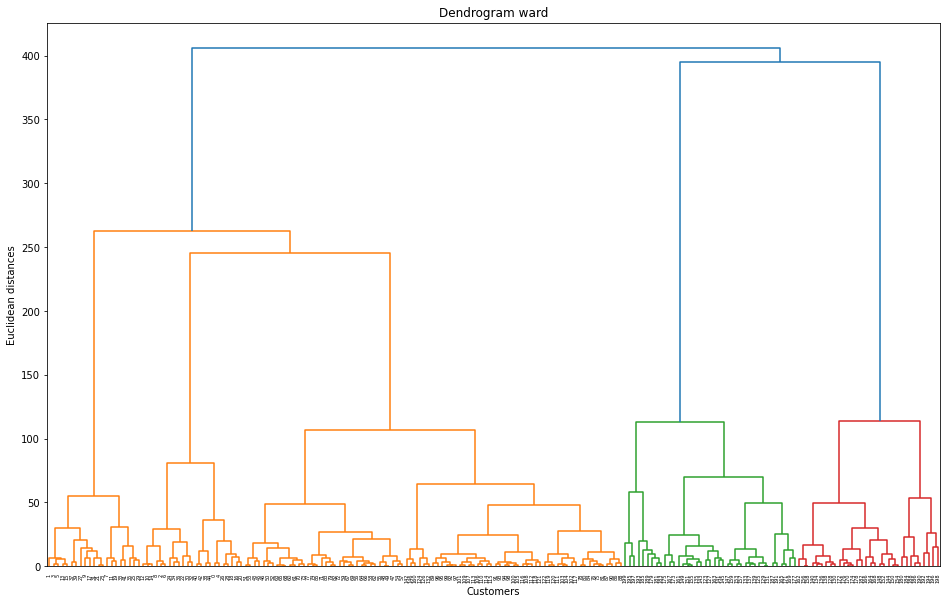

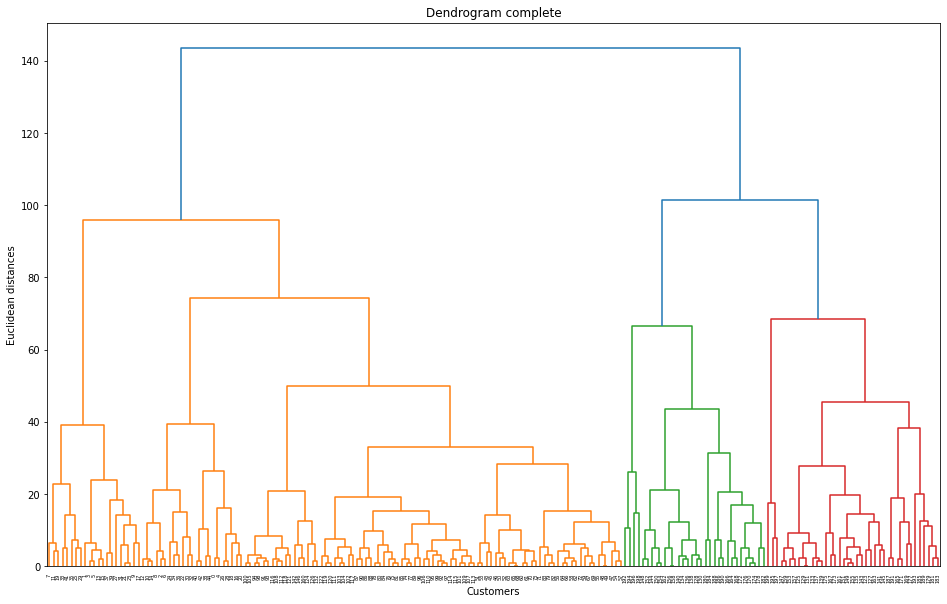

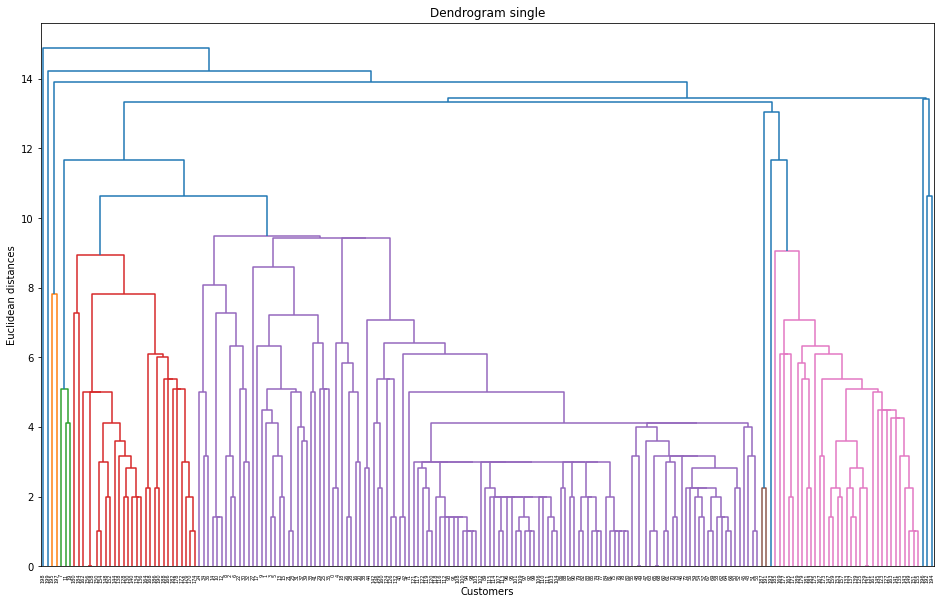

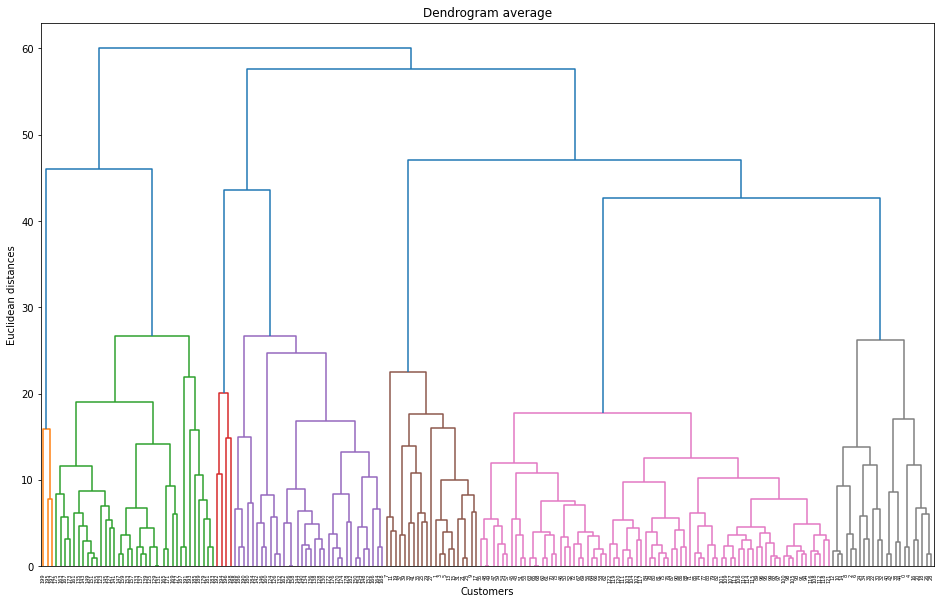

In [6]:

for link in ['ward', 'complete', 'single', 'average']:
    plt.figure(figsize = (16, 10))
    dendrogram = sch.dendrogram(sch.linkage(X, method = link))
    plt.title('Dendrogram ' + link)
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()

# Fcluster

In [15]:
from scipy.cluster.hierarchy import fcluster

mergings = sch.linkage(X, method = 'ward')

# Use fcluster to extract labels: labels
y_hc = fcluster(mergings, 5, criterion = 'distance')


In [13]:
labels

array([22,  2, 15,  1, 22,  1, 15, 10, 15,  4, 14,  9, 14,  1, 14,  1, 24,
        5, 25,  9, 24,  6, 19,  6, 17, 12, 23,  8, 23, 12, 18,  7, 18, 11,
       16, 13, 16,  3, 21,  3, 20, 11, 20, 27, 21, 27, 28, 37, 36, 36, 28,
       26, 28, 26, 37, 36, 35, 37, 35, 34, 30, 30, 35, 29, 35, 29, 35, 34,
       29, 34, 30, 33, 34, 30, 31, 50, 50, 31, 50, 32, 50, 50, 32, 32, 50,
       31, 51, 51, 51, 41, 51, 45, 42, 45, 45, 42, 41, 42, 45, 42, 45, 43,
       49, 48, 48, 45, 44, 43, 46, 43, 44, 48, 46, 43, 44, 44, 46, 49, 46,
       47, 47, 46, 47, 64, 40, 69, 39, 64, 76, 69, 76, 69, 39, 68, 75, 62,
       75, 68, 76, 68, 75, 65, 38, 62, 82, 65, 38, 67, 81, 62, 82, 62, 81,
       67, 82, 62, 74, 67, 74, 67, 38, 63, 74, 66, 79, 71, 80, 60, 79, 72,
       77, 71, 77, 60, 77, 61, 77, 73, 78, 56, 83, 55, 78, 55, 84, 58, 85,
       70, 86, 57, 85, 70, 87, 59, 88, 52, 89, 53, 90, 54], dtype=int32)

## Training the Hierarchical Clustering model on the dataset

In [0]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

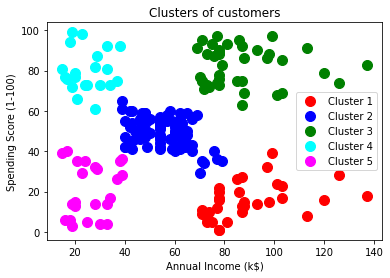

In [5]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()